In [8]:
import chipwhisperer as cw
from chipwhisperer.capture.api.programmers import STM32FProgrammer
import os

# Setup a connection with the CW board
# and fetch the scope for using this board.
scope = cw.scope()

# The default settings are fine for now.
scope.default_setup()

# Fetch the target from the scope
# This should be automatically connected
target = cw.target(scope)

# Initiate a new STM32F Program
# STM32 being the ARM microcontroller that we are using
program = STM32FProgrammer

# Manually specify the path to the firmware directory
# Adjust the path to where your firmware file is actually located
aes_firmware_dir = "D:\\Downloads\\University_Dump\\CR-A2\\Firmware_Files\\Masked"
aes_hex_path = os.path.join(aes_firmware_dir, "simpleserial-aes_CW308-STM32F3_MASKEDAES_ANSSI.hex")

# Apply the program to the actual target
# This allows us to run the hex code on the microcontroller
cw.program_target(scope, program, aes_hex_path)

# Your additional logic here

# Disconnect the scope and target
scope.dis()
target.dis()


Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11427 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11427 bytes


In [9]:
import string
import random
import numpy as np
def random_string(length):
    # Define the alphabet of the random string
    # Here we take the lowercase latin alphabet in ascii encoding
    # e.g. "cpjsapcnrsdtjvlo", "btqfocsprbualtwt" or "yzkwewjbkpmriccx"
    alphabet = string.ascii_lowercase

    # Return a string with the given length with randomly chosen chars
    return ''.join(random.choice(alphabet) for i in range(length))


In [10]:
from tqdm import trange
import random
import string

# Function to generate random strings
def random_string(length):
    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(length))

# Initialize scope and target
scope = cw.scope()
if scope is None:
    print("Scope is not initialized.")
    exit(1)
scope.default_setup()

target = cw.target(scope)
if target is None:
    print("Target is not initialized.")
    exit(1)

key_str = 'H4ck3rm4n-l33t42'
key = bytearray(key_str, 'ascii')
N = 100
textins = []
traces = []

for i in trange(N, desc="Capturing traces"):
    plain_text = bytearray(random_string(16), 'ascii')
    trace = cw.capture_trace(scope, target, plain_text, key)
    if trace is None:
        print("Capture failed; skipping trace.")
        continue

    textins.append(plain_text)
    traces.append(trace.wave)

# Disconnect scope and target
#scope.dis()
#target.dis()


Capturing traces: 100%|██████████| 100/100 [00:04<00:00, 22.77it/s]


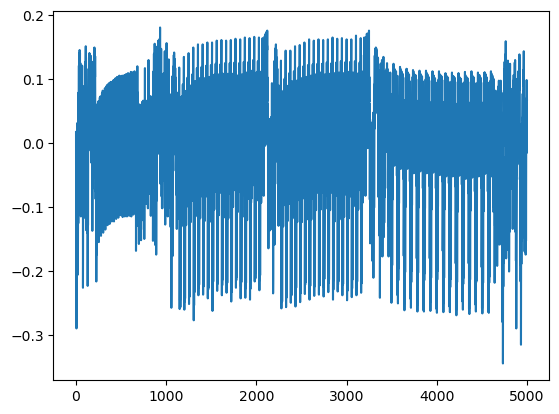

In [11]:
# Define the key used for the encryption
# This key has to be 128 bits = 16 bytes
# = 16 ascii characters in length
key_str = 'H4ck3rm4n-l33t42'

# Convert the key to a byte array
key = bytearray(key_str, 'ascii')

# Define the plain text used
# This plain text has to be a multiple of
# 128 bits = 16 bytes = 16 ascii characters in length.
plain_text = bytearray('a' * 16, 'ascii')

# Capture the actual trace
trace = cw.capture_trace(scope, target, plain_text, key)
import matplotlib.pyplot as plt

plt.plot(trace.wave)
plt.show()


In [12]:
np_traces = np.asarray(traces)
np_textins = np.asarray(textins)

In [13]:
np.save('traces.npy', np_traces)
np.save('textins.npy', np_textins)
scope.dis()
target.dis()